In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# pokemon dataframe 
pokemon = pd.DataFrame({
    'atak': [49, 52, 48, 55, 45],
    'savunma': [49, 43, 65, 40, 160],
     'hız': [45, 65, 43, 90, 70],
     'tür': ['ot', 'ateş', 'su', 'elektrik', 'kaya']
    }, index=["Bulbasaur", "Charmander", "Squirtle", "Pikachu", "Onix"])

In [7]:
pokemon

,atak,savunma,hız,tür
Bulbasaur,49,49,45,ot
Charmander,52,43,65,ateş
Squirtle,48,65,43,su
Pikachu,55,40,90,elektrik
Onix,45,160,70,kaya


In [9]:
pokemon.columns

Index(['atak', 'savunma', 'hız', 'tür'], dtype='object')

In [10]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, Bulbasaur to Onix
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   atak     5 non-null      int64 
 1   savunma  5 non-null      int64 
 2   hız      5 non-null      int64 
 3   tür      5 non-null      object
dtypes: int64(3), object(1)
memory usage: 200.0+ bytes


In [12]:
pokemon.size

20

In [14]:
pokemon.shape

(5, 4)

In [16]:
pokemon.describe()

,atak,savunma,hız
count,5.000000,5.000000,5.000000
mean,49.800000,71.400000,62.600000
std,3.834058,50.460876,19.398454
min,45.000000,40.000000,43.000000
25%,48.000000,43.000000,45.000000
50%,49.000000,49.000000,65.000000
75%,52.000000,65.000000,70.000000
max,55.000000,160.000000,90.000000


In [18]:
pokemon["hız"]

Bulbasaur     45
Charmander    65
Squirtle      43
Pikachu       90
Onix          70
Name: hız, dtype: int64

In [20]:
pokemon.iloc[1]

atak         52
savunma      43
hız          65
tür        ateş
Name: Charmander, dtype: object

In [22]:
pokemon.loc["Pikachu"]

atak             55
savunma          40
hız              90
tür        elektrik
Name: Pikachu, dtype: object

In [24]:
pokemon.loc["Charmander": "Squirtle", "atak": "savunma"]

,atak,savunma
Charmander,52,43
Squirtle,48,65


In [26]:
pokemon

,atak,savunma,hız,tür
Bulbasaur,49,49,45,ot
Charmander,52,43,65,ateş
Squirtle,48,65,43,su
Pikachu,55,40,90,elektrik
Onix,45,160,70,kaya


In [28]:
pokemon["hız"] > 60

Bulbasaur     False
Charmander     True
Squirtle      False
Pikachu        True
Onix           True
Name: hız, dtype: bool

In [30]:
pokemon.loc[pokemon["hız"] > 60]

,atak,savunma,hız,tür
Charmander,52,43,65,ateş
Pikachu,55,40,90,elektrik
Onix,45,160,70,kaya


In [32]:
pokemon.loc[pokemon["hız"] > 60, "hız"]

Charmander    65
Pikachu       90
Onix          70
Name: hız, dtype: int64

In [39]:
pokemon.drop("Bulbasaur")
#Not: Silme operasyonunda "inplace" parametresini True yapmazsak tablo modifiye edilmez.

,atak,savunma,hız,tür
Charmander,52,43,65,ateş
Squirtle,48,65,43,su
Pikachu,55,40,90,elektrik
Onix,45,160,70,kaya


In [36]:
pokemon.drop(["Pikachu", "Onix"])

,atak,savunma,hız,tür
Bulbasaur,49,49,45,ot
Charmander,52,43,65,ateş
Squirtle,48,65,43,su


In [38]:
pokemon.drop(["hız", "tür"], axis=1)

,atak,savunma
Bulbasaur,49,49
Charmander,52,43
Squirtle,48,65
Pikachu,55,40
Onix,45,160


In [41]:
pokemon[["atak", "savunma"]] / 10

,atak,savunma
Bulbasaur,4.9,4.9
Charmander,5.2,4.3
Squirtle,4.8,6.5
Pikachu,5.5,4.0
Onix,4.5,16.0


In [43]:
# liste, numpy array ya da seri kullanabiliriz
pokemon[["atak", "savunma"]] + [10, 5]

,atak,savunma
Bulbasaur,59,54
Charmander,62,48
Squirtle,58,70
Pikachu,65,45
Onix,55,165


In [47]:
boylar = pd.Series(
    [0.7, 0.6, 0.5, 0.4, 8.8],
    index=pokemon.index) 
print(boylar)

Bulbasaur     0.7
Charmander    0.6
Squirtle      0.5
Pikachu       0.4
Onix          8.8
dtype: float64


In [50]:
pokemon["boy"] = boylar
pokemon

,atak,savunma,hız,tür,boy
Bulbasaur,49,49,45,ot,0.7
Charmander,52,43,65,ateş,0.6
Squirtle,48,65,43,su,0.5
Pikachu,55,40,90,elektrik,0.4
Onix,45,160,70,kaya,8.8


In [52]:
pokemon["boy"] = 1
pokemon

,atak,savunma,hız,tür,boy
Bulbasaur,49,49,45,ot,1
Charmander,52,43,65,ateş,1
Squirtle,48,65,43,su,1
Pikachu,55,40,90,elektrik,1
Onix,45,160,70,kaya,1


In [55]:
pokemon["boy"].dtype

dtype('int64')

In [57]:
pokemon["boy"] = boylar

In [59]:
pokemon.rename(
    columns={
        "atak": "attack",
        "savunma": "defense",
        "tür": "type",
        "hız": "speed",
        "boy": "height"
    }
)

,attack,defense,speed,type,height
Bulbasaur,49,49,45,ot,0.7
Charmander,52,43,65,ateş,0.6
Squirtle,48,65,43,su,0.5
Pikachu,55,40,90,elektrik,0.4
Onix,45,160,70,kaya,8.8


In [68]:
new_pokemon = pd.Series({"atak": 104, "savunma": 78, "tür": "ateş", "hız": 100, "boy": 1.7}, name="Charizard")
pokemon=pd.concat([pokemon,new_pokemon.to_frame().T])
pokemon

,atak,savunma,hız,tür,boy
Bulbasaur,49,49,45,ot,0.7
Charmander,52,43,65,ateş,0.6
Squirtle,48,65,43,su,0.5
Pikachu,55,40,90,elektrik,0.4
Onix,45,160,70,kaya,8.8
0,104,78,100,ateş,1.7
0,104,78,100,ateş,1.7
Charizard,104,78,100,ateş,1.7
Charizard,104,78,100,ateş,1.7


In [70]:
pokemon = pokemon.drop(pokemon[pokemon.index == 0].index)

print(pokemon)

           atak savunma  hız       tür  boy
Bulbasaur    49      49   45        ot  0.7
Charmander   52      43   65      ateş  0.6
Squirtle     48      65   43        su  0.5
Pikachu      55      40   90  elektrik  0.4
Onix         45     160   70      kaya  8.8
Charizard   104      78  100      ateş  1.7
Charizard   104      78  100      ateş  1.7


In [73]:
pokemon = pokemon.drop_duplicates()

print(pokemon)

           atak savunma  hız       tür  boy
Bulbasaur    49      49   45        ot  0.7
Charmander   52      43   65      ateş  0.6
Squirtle     48      65   43        su  0.5
Pikachu      55      40   90  elektrik  0.4
Onix         45     160   70      kaya  8.8
Charizard   104      78  100      ateş  1.7


In [76]:
pokemon["toplam güç"] = pokemon["atak"] + pokemon["savunma"] + pokemon["hız"]
pokemon

,atak,savunma,hız,tür,boy,toplam güç
Bulbasaur,49,49,45,ot,0.7,143
Charmander,52,43,65,ateş,0.6,160
Squirtle,48,65,43,su,0.5,156
Pikachu,55,40,90,elektrik,0.4,185
Onix,45,160,70,kaya,8.8,275
Charizard,104,78,100,ateş,1.7,282


In [78]:
pokemon["saldırganlık"] = pokemon["atak"] / pokemon["savunma"]
pokemon

,atak,savunma,hız,tür,boy,toplam güç,saldırganlık
Bulbasaur,49,49,45,ot,0.7,143,1.0
Charmander,52,43,65,ateş,0.6,160,1.209302
Squirtle,48,65,43,su,0.5,156,0.738462
Pikachu,55,40,90,elektrik,0.4,185,1.375
Onix,45,160,70,kaya,8.8,275,0.28125
Charizard,104,78,100,ateş,1.7,282,1.333333


In [85]:
df = pd.read_csv("C:\\Users\\Lala\\Downloads\\btc-market-price.csv")
print(df.head())

   2017-04-02 00:00:00  1099.169125
0  2017-04-03 00:00:00  1141.813000
1  2017-04-04 00:00:00  1141.600363
2  2017-04-05 00:00:00  1133.079314
3  2017-04-06 00:00:00  1196.307937
4  2017-04-07 00:00:00  1190.454250


In [87]:
df = pd.read_csv("C:\\Users\\Lala\\Downloads\\btc-market-price.csv", header=None)
df.columns = ["zaman", "değer"]
print(df.head())

                 zaman        değer
0  2017-04-02 00:00:00  1099.169125
1  2017-04-03 00:00:00  1141.813000
2  2017-04-04 00:00:00  1141.600363
3  2017-04-05 00:00:00  1133.079314
4  2017-04-06 00:00:00  1196.307937


In [89]:
df["zaman"] = pd.to_datetime(df["zaman"])
df["zaman"].head()

0   2017-04-02
1   2017-04-03
2   2017-04-04
3   2017-04-05
4   2017-04-06
Name: zaman, dtype: datetime64[ns]

<Axes: xlabel='zaman'>

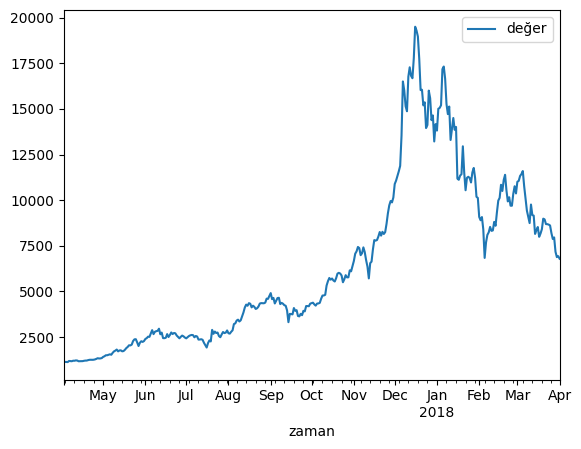

In [100]:
df.plot()

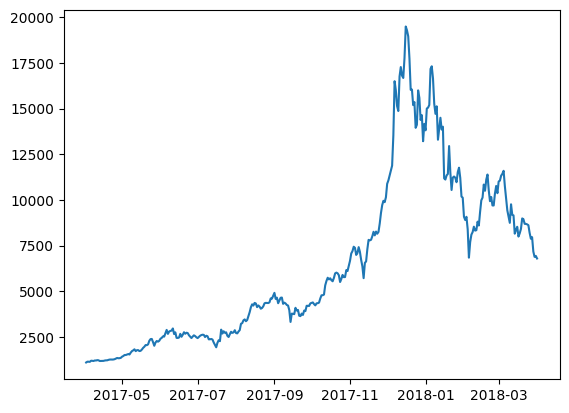

In [104]:
plt.plot(df.index, df["değer"])